# Time Series with Statistics Method: ARIMA & SARIMA

Collection of methods and models on how to make an analysis and prediction with ARIMA and SARIMA method. Functions referred to **Time Series Forecasting in Pythin written by Marco Peixeiro (2022)** with several adjustments. All plug-and-play functions could be seen in fun_arma-family.py file. Methods used on this study is:

- ARIMA: Auto-Regressive Integrated Moving Average
- SARIMA: Seasonal Auto-Regressive Integrated Moving Average

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL

In [244]:
# hide all warnings

import warnings
warnings.filterwarnings("ignore")

## Data Exploration

Data used in this study is the **time series data for fruits and vegetables from 2013 - 2021 in Nepal** by Ram K. Rijal. He made it available on his <a href='https://www.kaggle.com/datasets/ramkrijal/agriculture-vegetables-fruits-time-series-prices'>Kaggle page</a>. 

In [245]:
df = pd.read_csv('dataset/kalimati_tarkari_dataset.csv', 
                 parse_dates=True,
                 infer_datetime_format=True)

df.index = df['Date']
df = df.drop('Date', axis=1)
df.index = pd.to_datetime(df.index)
df.head(5)

,SN,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,,
2013-06-16,0,Tomato Big(Nepali),Kg,35.0,40.0,37.5
2013-06-16,1,Tomato Small(Local),Kg,26.0,32.0,29.0
2013-06-16,2,Potato Red,Kg,20.0,21.0,20.5
2013-06-16,3,Potato White,Kg,15.0,16.0,15.5
2013-06-16,4,Onion Dry (Indian),Kg,28.0,30.0,29.0


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197161 entries, 2013-06-16 to 2021-05-13
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SN         197161 non-null  int64  
 1   Commodity  197161 non-null  object 
 2   Unit       197161 non-null  object 
 3   Minimum    197161 non-null  float64
 4   Maximum    197161 non-null  float64
 5   Average    197161 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.5+ MB


In [247]:
import random

print(random.sample(list(df['Commodity'].unique()), 5))
print('Number of commodities in the data:', len(df['Commodity'].unique()))

['Chilli Green(Akbare)', 'Tomato Small(Terai)', 'Bitter Gourd', 'Carrot(Terai)', 'Pear(Local)']
Number of commodities in the data: 132


In [248]:
# all fruits aggreagated by month

weekly_df = df.groupby(pd.Grouper(freq='W')).agg({'Average': 'mean',
                                                   'Minimum': 'min',
                                                   'Maximum': 'max'})

weekly_df.index = pd.to_datetime(weekly_df.index)
weekly_df.head(5)

,Average,Minimum,Maximum
Date,,,
2013-06-16,68.574324,6.0,400.0
2013-06-23,67.856948,6.0,400.0
2013-06-30,67.575419,4.0,400.0
2013-07-07,70.070402,5.0,550.0
2013-07-14,72.538682,6.0,500.0


In [249]:
# all fruits aggreagated by month

monthly_df = df.groupby(pd.Grouper(freq='M')).agg({'Average': 'mean',
                                                   'Minimum': 'min',
                                                   'Maximum': 'max'})

monthly_df.index = pd.to_datetime(monthly_df.index, format = '%Y-%m/%d').strftime('%Y/%m')
monthly_df.head(5)

,Average,Minimum,Maximum
Date,,,
2013/06,67.797247,4.0,400.0
2013/07,70.229971,5.0,660.0
2013/08,72.384778,8.0,500.0
2013/09,75.949061,10.0,500.0
2013/10,80.044691,6.0,500.0


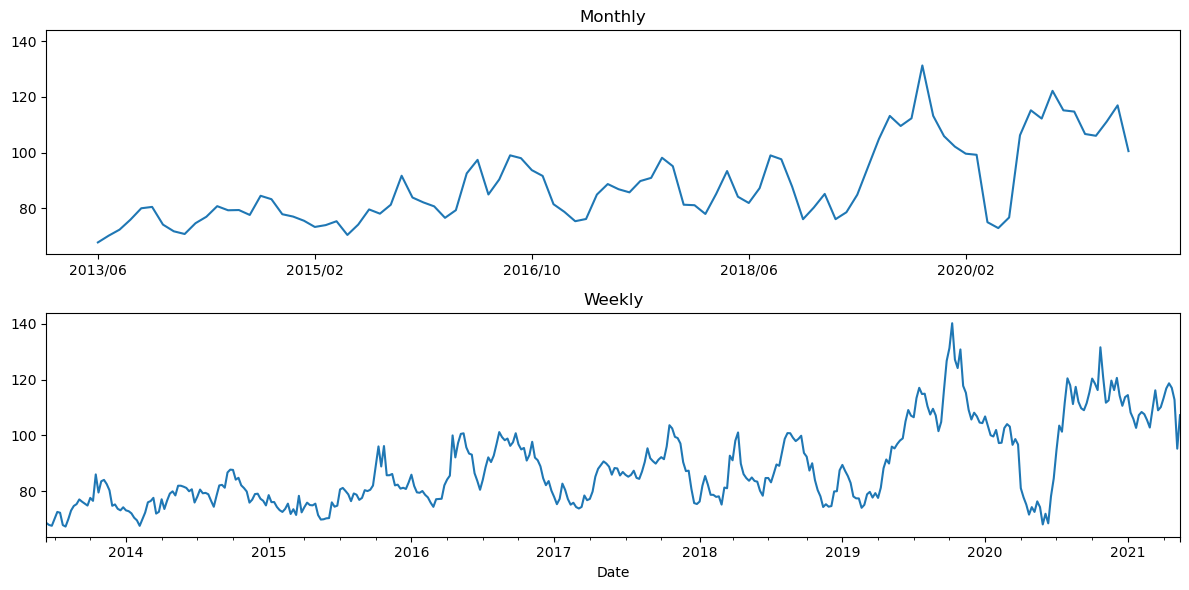

In [133]:
fig, axs = plt.subplots(2, figsize=(12,6), sharey=True)

monthly_df['Average'].plot(ax=axs[0], xlabel='', title='Monthly')
weekly_df['Average'].plot(ax=axs[1], title='Weekly')

plt.tight_layout()

    Check the components of time series

In [134]:
# only checking the montlhy sales data
# we will only use the data for monthly sales as it's easier and faster to run.

monthly_sales = monthly_df['Average']

In [135]:
decomposition = STL(monthly_sales, period=12).fit()

# print all of the composition

print('OBSERVED:\n', decomposition.observed[:3])        # real value
print('\nTREND:\n', decomposition.observed[:3])         # trend composition
print('\nSEASONAL:\n', decomposition.seasonal[:3])      # seasonality
print('\nRESIDUAL:\n', decomposition.resid[:3])         # residual

OBSERVED:
 Date
2013/06    67.797247
2013/07    70.229971
2013/08    72.384778
Name: Average, dtype: float64

TREND:
 Date
2013/06    67.797247
2013/07    70.229971
2013/08    72.384778
Name: Average, dtype: float64

SEASONAL:
 Date
2013/06   -2.419746
2013/07   -0.829298
2013/08   -2.050741
Name: season, dtype: float64

RESIDUAL:
 Date
2013/06   -1.563345
2013/07   -1.286141
2013/08    1.533535
Name: resid, dtype: float64


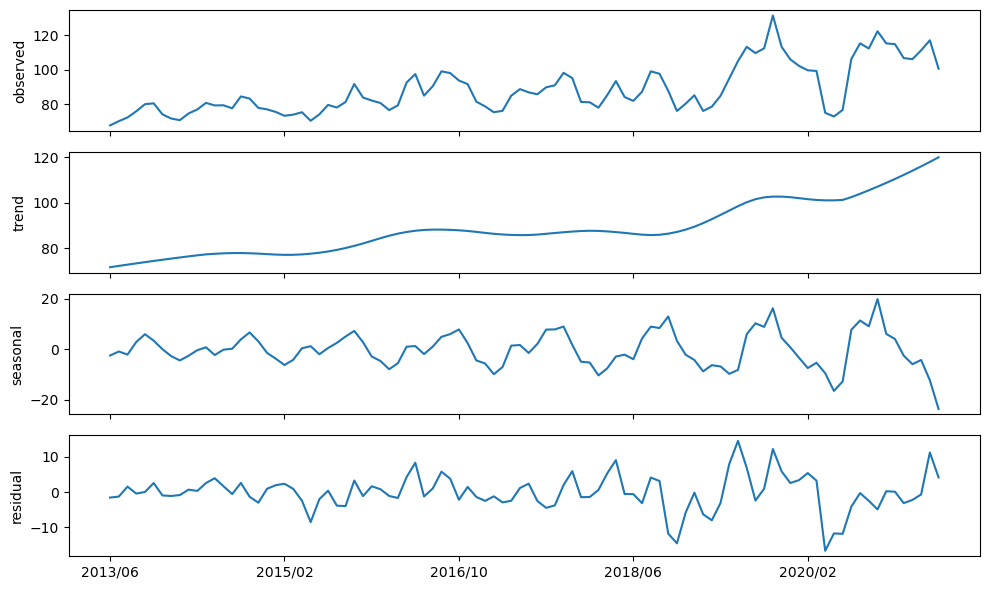

In [136]:
fig, axes = plt.subplots(4, figsize=(10,6), sharex=True)

decomposition.observed.plot(ax=axes[0], xlabel='', ylabel='observed')
decomposition.trend.plot(ax=axes[1], xlabel='', ylabel='trend')
decomposition.seasonal.plot(ax=axes[2], xlabel='', ylabel='seasonal')
decomposition.resid.plot(ax=axes[3], xlabel='', ylabel='residual')

plt.tight_layout()

## Step 1: Check the Stationarity of the Data

In [137]:
monthly_sales = monthly_df['Average']

print('ADF statistic:', adfuller(monthly_sales)[0])
print('ADF p-value:', adfuller(monthly_sales)[1])

ADF statistic: -0.2802512195569474
ADF p-value: 0.9282551528087624


In [138]:
weekly_sales = weekly_df['Average']

print('ADF statistic:', adfuller(weekly_sales)[0])
print('ADF p-value:', adfuller(weekly_sales)[1])

ADF statistic: -2.340921561800935
ADF p-value: 0.15910929310769728


    > If not stationary, apply transformation (differencing) until it's a stationary process

The data we have here **is not stationary** since the p-value is not significant, so we need to apply some transformations until it becomes stationary. One of the transformations is differencing.

In [139]:
monthly_df['diff_1'] = monthly_df['Average'].diff(periods=1)

print('ADF statistic:', adfuller(monthly_df['diff_1'].dropna())[0])
print('ADF p-value:', adfuller(monthly_df['diff_1'].dropna())[1])

ADF statistic: -6.126627662764297
ADF p-value: 8.59797058460328e-08


## Step 2: Grid Search, Minimize AIC by Adjusting Parameters

1. Looping the best parameters for the model
2. Fitting the best parameters to the model

### ARIMA (Auto-Regressive Integrated Moving Average)

Combination between Auto Regressive (AR), differencing of the data (if not stationary, I), and Moving Average (MA) Model. Parameters to set:

- p: Number for Auto Regressive ($Y_{t-p}$) 
- d: Number for how many differencing we have done
- q: Number for Moving Average ($\epsilon_{t-q}$)

    Function for SARIMA

In [140]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

# using ':' after parameter to state what's the type of the parameter we can pass to it
# using Union[pd.Series, list] as the type hint for endong, parameter can accept either pd.Series or list
# -> pd.DataFrame means that the function will return the result as a dataframe

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    results = []
    
    # looping orders in order_list, wrapped in tqdm to monitor the progress
    # looping order to loop all the possible p and q that we want to check, and fit to SARIMAX by statsmodels
    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, 
                            order=(order[0], d, order[1]),
                            simple_differencing=False).fit(disp=False)
        except:
            continue
        
        # calculate the model's aic for every looping, then append it to a list
        aic = model.aic
        results.append([order, aic])
    
    # convert all the aic in the results list to a dataframe, then rename the columns
    result_df = pd.DataFrame(results)
    result_df.columns = ['p, q', 'AIC']
    
    # sorting it by the smallest AIC value
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [141]:
# how to use the function

from itertools import product
import random

ps = range(0, 4, 1)     # define the range of p we want to check
qs = range(0, 4, 1)     # define the range of q we want to check
d = 1                   # how many differenceing have we done

order_list = list(product(ps, qs))  # pairing all ps values with qs values
random.sample(order_list, 5)  # print 5 samples from order list

[(3, 3), (1, 2), (1, 1), (0, 3), (3, 2)]

In [142]:
# use it to the function

monthly_sales_diff = monthly_df['diff_1'].dropna()

optimize_ARIMA(monthly_sales_diff, order_list=order_list, d=d)

  0%|          | 0/16 [00:00<?, ?it/s]

,"p, q",AIC
0,"(2, 3)",642.306795
1,"(3, 3)",643.023126
2,"(1, 2)",648.765957
3,"(1, 3)",650.545375
4,"(2, 2)",650.604553
5,"(3, 2)",652.052176
6,"(0, 3)",654.898579
7,"(2, 1)",654.999811
8,"(0, 1)",655.948548
9,"(0, 2)",656.159085


**The p, q is optimum at 2, 3**

### Seasonal Auto-Regressive Integrated Moving Average (SARIMA) or SARIMA(p, d, q)(P, D, Q)m

Combination between Auto Regressive (AR), differencing of the data (if not stationary, I), and Moving Average (MA) model by **accounting seasonality**. Parameters to set:

- p: Number for Auto Regressive ($Y_{t-p}$) 
- d: Number for how many differencing we have done
- q: Number for Moving Average ($\epsilon_{t-q}$)
- P: Seasonal counterparts for p
- D: Seasonal counterparts for d
- Q: Seasonal counterparts for q
- m: Frequency, number of observations per cycle

m really influences the value of P, D, Q. The formula is $t - (m * P)$. So **for example**, with m = 12, P = 2, would be t - 12 and t - 24. P and D are interchangable.

In [143]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

# in the model, m (the frequency) is declared as s

def optimize_SARIMA(endog: Union[pd.Series, list], 
                    order_list: list, d: int,
                    D: int, s: int) -> pd.DataFrame:
    results = []
    
    for order in tqdm_notebook(order_list):
        try:
            # the only difference from ARIMA is when trying to fit the data
            # we add new parameter, "seasonal_order"
            model = SARIMAX(
                endog,
                order=(order[0], d, order[1]),      
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
        
        aic = model.aic
        results.append([order, aic])
        
    results_df = pd.DataFrame(results)
    results_df.columns = ['(p, q, P, Q', 'AIC']
        
    results_df = results_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
        
    return results_df 

In [144]:
# how to use the function

from itertools import product
import random

ps = range(0, 4, 1)     # define the range of p we want to check
qs = range(0, 4, 1)     # define the range of q we want to check
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

d = 1                   # how many differencing have we done
D = 1                   # how many differencing have we done
s = 12                  # frequency in a cycle

order_list = list(product(ps, qs, Ps, Qs))  # pairing all ps values with qs values
random.sample(order_list, 5)  # print 5 samples from order list

[(3, 0, 3, 1), (1, 0, 2, 2), (1, 2, 3, 1), (3, 3, 1, 1), (1, 2, 1, 1)]

In [145]:
# use it to the function
# for sarima we will use the monthly sales as it will take a long time if we account the seasonality by weekly (s=52)

monthly_sales_diff = monthly_df['diff_1'].dropna()

optimize_SARIMA(monthly_sales_diff, order_list=order_list, d=d, D=D, s=s)

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p, q, P, Q",AIC
0,"(2, 3, 0, 1)",577.758054
1,"(2, 3, 0, 2)",579.380217
2,"(2, 3, 1, 1)",579.456580
3,"(3, 3, 0, 1)",579.765233
4,"(2, 3, 3, 0)",580.442703
...,...,...
251,"(2, 0, 0, 0)",637.826157
252,"(0, 0, 2, 0)",638.450246
253,"(0, 0, 1, 0)",640.430110
254,"(1, 0, 0, 0)",658.012887


**The p, q, P, Q is optimum at 2, 3, 0, 1**

## Step 4: Fitting the Model

    Splitting Test and Train Data

In [146]:
# taking 80% of the data for the training set
# the rest of them for the test

train_prop = int(np.ceil(len(monthly_df) * 0.8))
test_prop = int(np.floor(len(monthly_df) * 0.2))

train_ts = monthly_df['Average'].head(train_prop)
test_ts = monthly_df['Average'].tail(test_prop)

    Fitting the Model and Check Residuals

### Model 1: ARIMA(2, 1, 3)

In [147]:
# fitting ARIMA(2, 1, 3)

model = SARIMAX(train_ts, order=(2, 1, 3), simple_differencing=False)
model_fit = model.fit(disp=False)
model_fit.summary()  # printing the result

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Average   No. Observations:                   77
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -239.175
Date:                Tue, 21 Mar 2023   AIC                            490.349
Time:                        14:59:29   BIC                            504.334
Sample:                    06-01-2013   HQIC                           495.938
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5908      0.609     -0.969      0.332      -1.785       0.604
ar.L2          0.2101      0.387      0.543      0.587      -0.548       0.968
ma.L1          0.9176      2.025      0.453      0.650      -3.051       4.886
ma.L2         -0.3617      0.573     -0.631      0.528      -1.485       0.762
ma.L3         -0.2797      0.577     -0.484      0.628      -1.411       0.852
sigma2        30.7216     59.920      0.513      0.608     -86.719     148.162
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.91   Prob(JB):                         0.88
Heteroskedasticity (H):               4.08   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

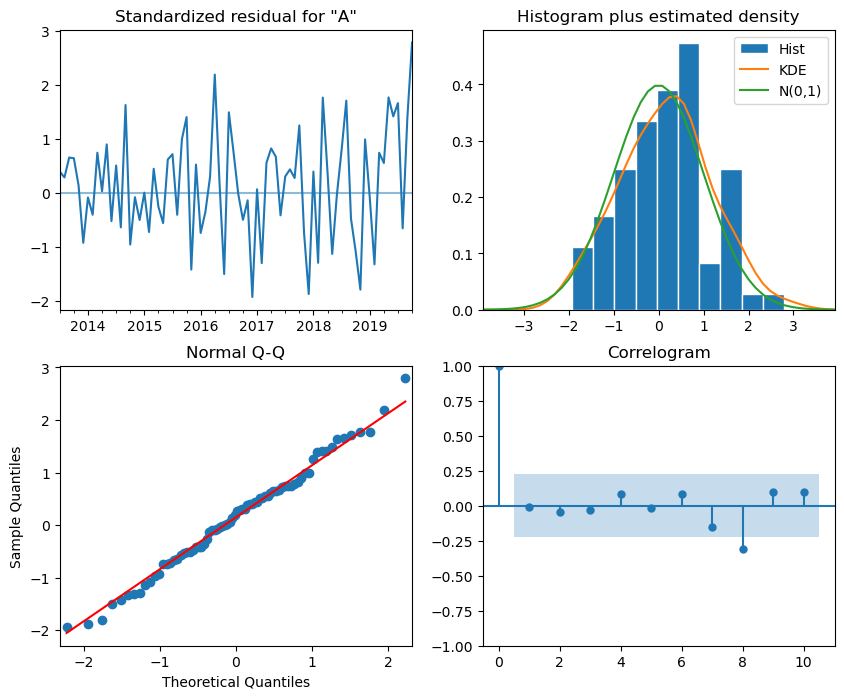

In [148]:
model_fit.plot_diagnostics(figsize=(10,8));

### What to check in the diagnostic plot?

- Residuals (top-left) should be constant over time
- Distribution of residuals (top-right) should be in normal distribution
- Q-Q Plot (bottom-left) shows that dot should be following the line (normal distribution of residuals)
- Colleogram (bottom-right) shows no significant coefficients after lag 0

In [149]:
# check residuals using statistic test
# ljung-box test

from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = model_fit.resid  # generate the residuals
acorr_ljungbox(residuals, np.arange(1, 11, 1))  # conducting ljung-box test with 10 lags

,lb_stat,lb_pvalue
1,0.013166,0.908650
2,0.013593,0.993227
3,0.047415,0.997293
4,0.351061,0.986284
5,0.351911,0.996551
6,0.414598,0.998728
7,0.739270,0.998015
8,2.253858,0.972223
9,2.698749,0.975052
10,2.792505,0.985894


All safe because all p-value for residuals lag are not significant.

### Model 2: SARIMA(2, 1, 3)(0, 1, 1)12

In [150]:
# fitting SARIMA(2, 1, 3)

model = SARIMAX(train_ts, 
                order=(2, 1, 3), 
                seasonal_order=(0, 1, 1, 12),
                simple_differencing=False)

model_fit = model.fit(disp=False)
model_fit.summary()  # printing the result

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              Average   No. Observations:                   77
Model:             SARIMAX(2, 1, 3)x(0, 1, [1], 12)   Log Likelihood                -197.785
Date:                              Tue, 21 Mar 2023   AIC                            409.569
Time:                                      14:59:30   BIC                            424.681
Sample:                                  06-01-2013   HQIC                           415.523
                                       - 10-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6150      0.082      7.545      0.000       0.455       0.775
ar.L2         -0.8713      0.091     -9.576      0.000      -1.050      -0.693
ma.L1         -0.6973      5.431     -0.128      0.898     -11.341       9.946
ma.L2          0.6758      8.967      0.075      0.940     -16.900      18.252
ma.L3          0.3175      3.326      0.095      0.924      -6.202       6.837
ma.S.L12      -0.9945     17.066     -0.058      0.954     -34.444      32.455
sigma2        17.1949    321.765      0.053      0.957    -613.453     647.842
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.87   Prob(JB):                         0.69
Heteroskedasticity (H):               2.28   Skew:                            -0.08
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

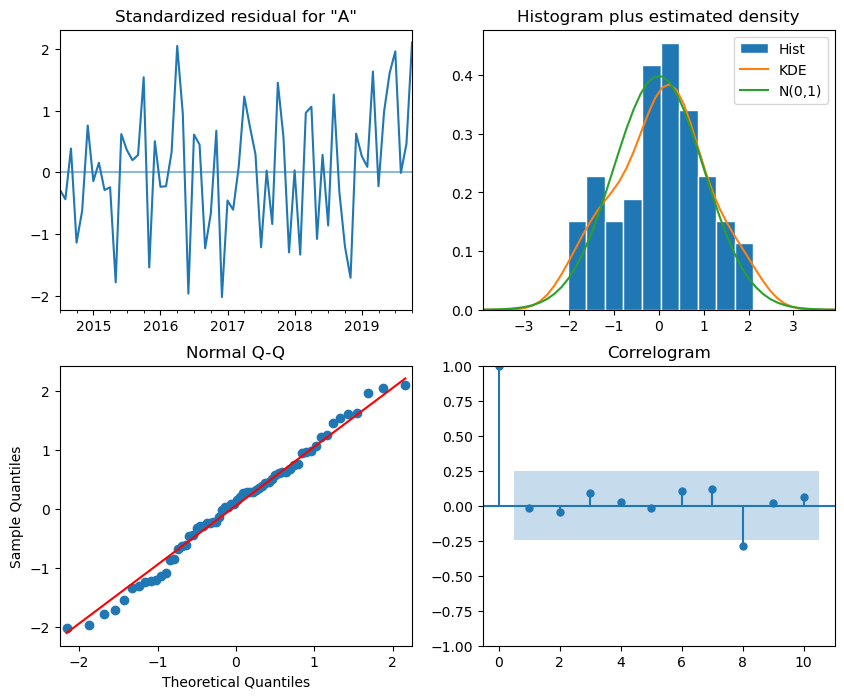

In [151]:
model_fit.plot_diagnostics(figsize=(10,8));

In [152]:
# check residuals using statistic test
# ljung-box test

from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = model_fit.resid  # generate the residuals
acorr_ljungbox(residuals, np.arange(1, 11, 1))  # conducting ljung-box test with 10 lags

,lb_stat,lb_pvalue
1,0.018188,0.892722
2,0.033267,0.983504
3,0.049552,0.997110
4,0.555045,0.967926
5,0.573036,0.989204
6,0.593009,0.996516
7,0.625087,0.998847
8,1.244916,0.996178
9,1.393921,0.997860
10,1.558038,0.998743


## Step 5: Making the Prediction

### Model Baseline: Naive Model

In [199]:
NAIVE_pred = monthly_df['Average'][-(test_prop*2):-test_prop]
NAIVE_pred

Date
2018/04     93.401563
2018/05     84.184921
2018/06     81.946363
2018/07     87.270263
2018/08     99.011976
2018/09     97.625418
2018/10     87.771716
2018/11     76.120690
2018/12     80.332359
2019/01     85.197313
2019/02     76.133680
2019/03     78.618613
2019/04     84.901352
2019/05     94.935949
2019/06    104.930271
2019/07    113.173436
2019/08    109.563664
2019/09    112.318844
2019/10    131.272598
Name: Average, dtype: float64

### Model 1: ARIMA(2, 1, 3)

In [207]:
model = SARIMAX(train_ts, order=(2, 1, 3), simple_differencing=False)
model_fit = model.fit(disp=False)

ARIMA_pred = model_fit.get_prediction(train_prop, train_prop + test_prop - 1).predicted_mean
ARIMA_pred

2019-11-01    132.975802
2019-12-01    128.195554
2020-01-01    127.074184
2020-02-01    126.732242
2020-03-01    126.698635
2020-04-01    126.646639
2020-05-01    126.670297
2020-06-01    126.645394
2020-07-01    126.665078
2020-08-01    126.648215
2020-09-01    126.662314
2020-10-01    126.650441
2020-11-01    126.660418
2020-12-01    126.652029
2021-01-01    126.659082
2021-02-01    126.653152
2021-03-01    126.658138
2021-04-01    126.653946
2021-05-01    126.657470
Freq: MS, Name: predicted_mean, dtype: float64

### Model 2: SARIMA(2, 1, 3)(0, 1, 1)12

In [208]:
model = SARIMAX(train_ts,
                order=(2, 1, 3),      
                seasonal_order=(0, 1, 1, 12),
                simple_differencing=False)

model_fit = model.fit(disp=False)

SARIMA_pred = model_fit.get_prediction(train_prop, train_prop + test_prop - 1).predicted_mean
SARIMA_pred

2019-11-01    131.592246
2019-12-01    121.071784
2020-01-01    115.349978
2020-02-01    113.407620
2020-03-01    121.979689
2020-04-01    130.407440
2020-05-01    127.979677
2020-06-01    123.300721
2020-07-01    127.630931
2020-08-01    134.503765
2020-09-01    138.618406
2020-10-01    139.871339
2020-11-01    132.508735
2020-12-01    127.000607
2021-01-01    128.594244
2021-02-01    126.783541
2021-03-01    129.062387
2021-04-01    133.505027
2021-05-01    134.109877
Freq: MS, Name: predicted_mean, dtype: float64

In [222]:
# combine into a big one dataframe
# change the index first 

NAIVE_pred.index = SARIMA_pred.index

pred_df = pd.concat({
    'naive': NAIVE_pred,
    'arima': ARIMA_pred, 
    'sarima': SARIMA_pred
    }, axis=1)

pred_df.index = pd.to_datetime(pred_df.index, format = '%Y-%m/%d').strftime('%Y/%m')
pred_df

,naive,arima,sarima
2019/11,93.401563,132.975802,131.592246
2019/12,84.184921,128.195554,121.071784
2020/01,81.946363,127.074184,115.349978
2020/02,87.270263,126.732242,113.407620
2020/03,99.011976,126.698635,121.979689
2020/04,97.625418,126.646639,130.407440
2020/05,87.771716,126.670297,127.979677
2020/06,76.120690,126.645394,123.300721
2020/07,80.332359,126.665078,127.630931
2020/08,85.197313,126.648215,134.503765


In [250]:
monthly_df = pd.concat([monthly_df, pred_df], axis=1)
monthly_df.tail(10)

,Average,Minimum,Maximum,naive,arima,sarima
2020/08,115.186057,10.0,600.0,85.197313,126.648215,134.503765
2020/09,112.216330,15.0,460.0,76.133680,126.662314,138.618406
2020/10,122.167270,10.0,2000.0,78.618613,126.650441,139.871339
2020/11,115.177947,8.0,700.0,84.901352,126.660418,132.508735
2020/12,114.727186,8.0,600.0,94.935949,126.652029,127.000607
2021/01,106.686689,8.0,800.0,104.930271,126.659082,128.594244
2021/02,106.044161,8.0,650.0,113.173436,126.653152,126.783541
2021/03,111.158775,8.0,1000.0,109.563664,126.658138,129.062387
2021/04,116.958591,10.0,700.0,112.318844,126.653946,133.505027
2021/05,100.550893,10.0,1200.0,131.272598,126.657470,134.109877


<Figure size 640x480 with 0 Axes>

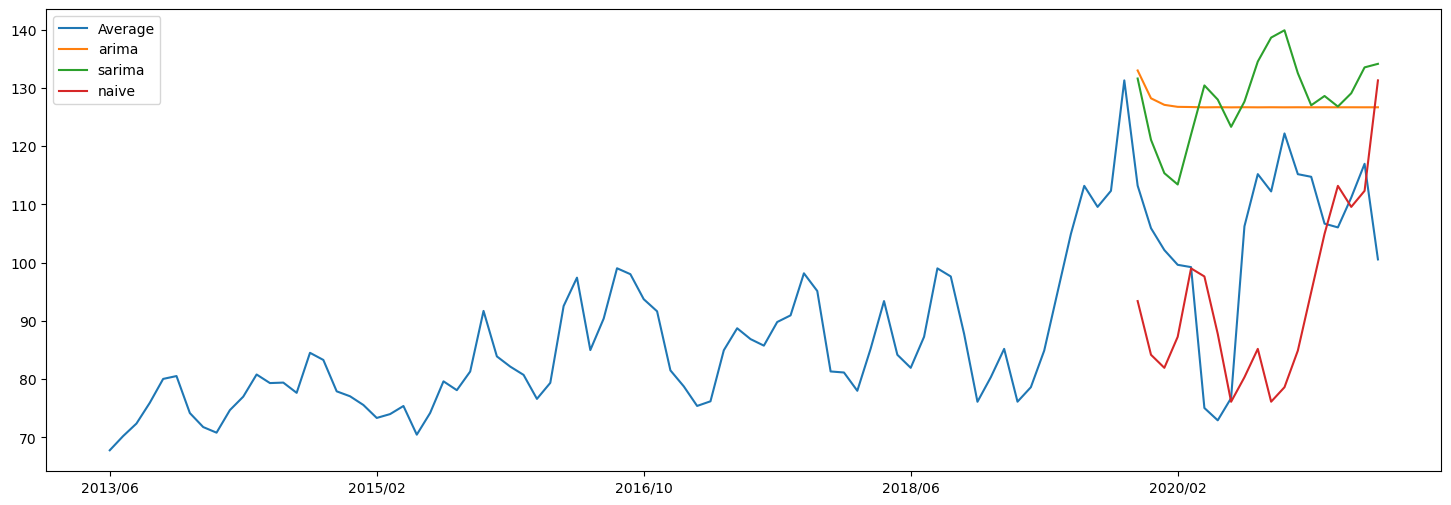

In [254]:
# plot the data

monthly_df[['Average', 'arima', 'sarima', 'naive']].plot(figsize=(18,6))

plt.show()

## Step 6: Evaluating the Model

In [268]:
# defining the function to calculat mean absolute percentage error

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

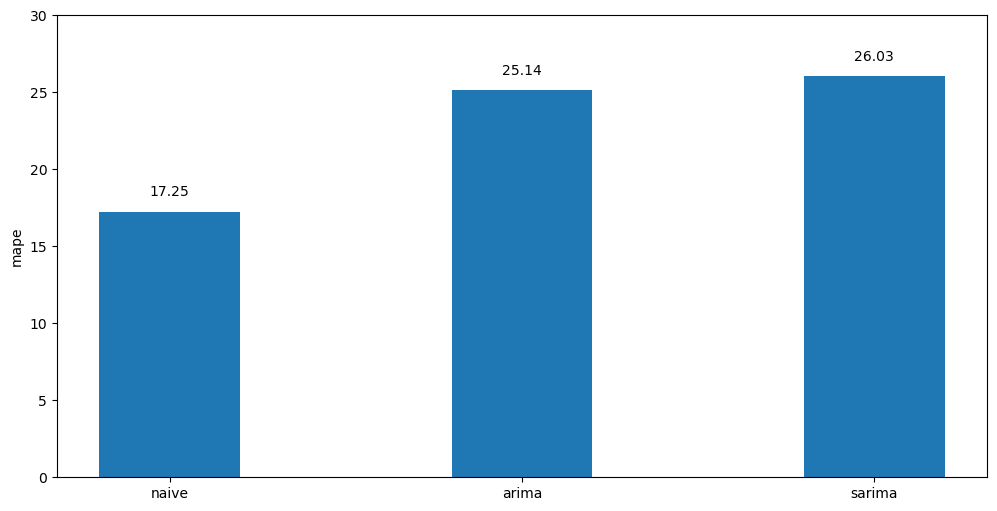

In [277]:
test_df = monthly_df.tail(test_prop)

# define all variable

mape_naive = mape(test_df['Average'], test_df['naive'])
mape_arima = mape(test_df['Average'], test_df['arima'])
mape_sarima = mape(test_df['Average'], test_df['sarima'])


# plot all the variable

fig, ax = plt.subplots(figsize=(12,6))

x = ['naive', 'arima', 'sarima']
y = [mape_naive, mape_arima, mape_sarima]

ax.bar(x, y, width=0.4)
ax.set_ylim(0,30)
ax.set_ylabel('mape')


# adding data point to the plot

for i, val in enumerate(y):
    plt.text(x=i, y=val + 1, s=str(round(val, 2)), ha='center')

The result might be not the one that I was expecting for with Naive method being the best predictor. It has something to do by splitting the train and test. The split point was at 2019, where the corona just about to happen. But still from the graph, we can see that SARIMA still could follow along the seasonality from the test data, which is good.